In [1]:
import time 
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [2]:
# Initialize a list of tickers for the stock
tickers = ["LYV", "AMC", "AMZN", "NFLX", "DRI", "RUTH", "DAL", "AAL"]

#Define the variables
precovid_date = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid_date = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"

# Initialize an empty list to store the dataframes for each stock
dfs = []

# Fetch the data for each stock and store it in the dfs list
for ticker in tickers:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid_date}&period2={postcovid_date}&interval={interval}&events=history&includeAdjustedClose=true"
    df = pd.read_csv(query_string)
    df['Ticker'] = ticker
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime format
    dfs.append(df)

# Concatenate all the dataframes in the dfs list based on the common "Date" column
combined_df = pd.concat(dfs)

# Calculate Daily Trade Value for each stock
combined_df['Daily Trade Value'] = combined_df['Close'].astype(float) * combined_df['Volume'].astype(float)

# Rearrange columns with "Ticker" as the first column
combined_df = combined_df[['Ticker'] + [col for col in combined_df.columns if col != 'Ticker']]

#Change Datetime to Type Integer
combined_df['Date'] = pd.to_datetime(combined_df['Date']).astype(np.int64)

combined_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Trade Value
0,LYV,1420070400000000000,26.219999,26.379999,24.709999,25.110001,25.110001,2973500,7.466459e+07
1,LYV,1420675200000000000,25.389999,25.940001,24.440001,24.680000,24.680000,3113900,7.685105e+07
2,LYV,1421280000000000000,24.750000,25.120001,24.330000,24.780001,24.780001,2537000,6.286686e+07
3,LYV,1421884800000000000,24.950001,25.709999,24.500000,24.549999,24.549999,4677400,1.148302e+08
4,LYV,1422489600000000000,24.559999,24.770000,23.530001,24.389999,24.389999,6481700,1.580887e+08
...,...,...,...,...,...,...,...,...,...
413,AAL,1669852800000000000,14.460000,14.570000,13.530000,13.550000,13.550000,126615800,1.715644e+09
414,AAL,1670457600000000000,13.650000,14.740000,13.240000,13.350000,13.350000,152529900,2.036274e+09
415,AAL,1671062400000000000,13.160000,13.310000,12.380000,13.030000,13.030000,124570400,1.623152e+09
416,AAL,1671667200000000000,12.980000,13.000000,12.230000,12.320000,12.320000,81902700,1.009041e+09


In [40]:
#Define a function for making scatter plot pre-cvoid
def precovid(x_values, y_values):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    plt.xticks([])
    
    plt.xlabel('2015 to 2019')
    plt.ylabel('Volume')

    plt.show()
    print(f"The r-value is: {r_value}")

In [41]:
#Define a function for making scatter plot post-covid
def postcovid(x_values, y_values):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    plt.xticks([])
    
    plt.xlabel('2020 to Present')
    plt.ylabel('Volume')

    plt.show()
    print(f"The r-value is: {r_value}")

In [42]:
#Define dataframes for pre/post covid per ticker

#precovid
precovid_lyv = combined_df[(combined_df['Ticker']=='LYV') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_amc = combined_df[(combined_df['Ticker']=='AMC') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_amzn = combined_df[(combined_df['Ticker']=='AMZN') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_nflx = combined_df[(combined_df['Ticker']=='NFLX') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_dri = combined_df[(combined_df['Ticker']=='DRI') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_ruth = combined_df[(combined_df['Ticker']=='RUTH') & (combined_df['Date'].values <= 1577750400000000000)]
precovid_dal = combined_df[(combined_df['Ticker']=='DAL') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_aal = combined_df[(combined_df['Ticker']=='AAL') & (combined_df['Date'].values <= 1577750400000000000)] 

#postcovid
postcovid_lyv = combined_df[(combined_df['Ticker'] == 'LYV')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_amc = combined_df[(combined_df['Ticker'] == 'AMC')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_amzn = combined_df[(combined_df['Ticker'] == 'AMZN')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_nflx = combined_df[(combined_df['Ticker'] == 'NFLX')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_dri = combined_df[(combined_df['Ticker'] == 'DRI')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_ruth = combined_df[(combined_df['Ticker'] == 'RUTH')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_dal = combined_df[(combined_df['Ticker'] == 'DAL')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_aal = combined_df[(combined_df['Ticker'] == 'AAL')&(combined_df['Date'].values>=1577836800000000000)]


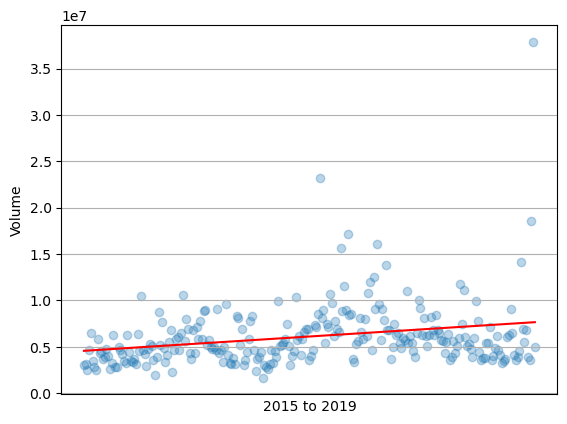

The r-value is: 0.2593899291496842


In [43]:
# Linear regression on PreCovid 
precovid(precovid_lyv['Date'], precovid_lyv['Volume'])